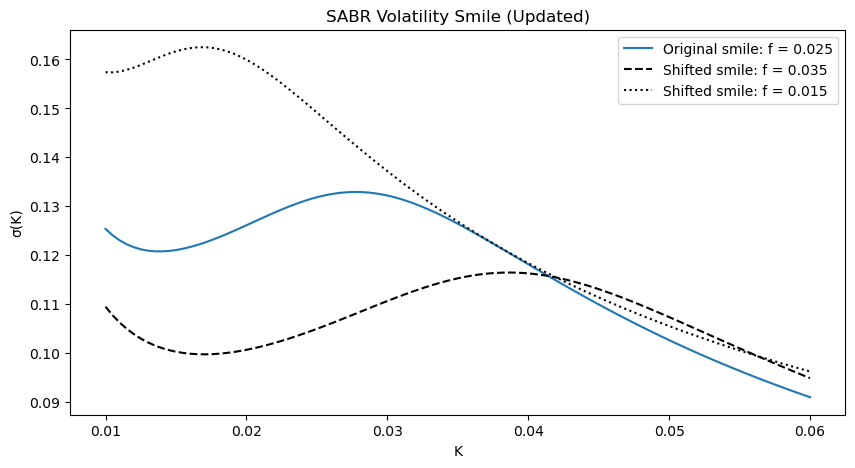

In [9]:
# Update the SABR volatility function to match the provided formula
def sabr_volatility_formula(alpha, beta, rho, nu, F, K, T):
    # Variables as defined in the provided formula
    z = (nu / alpha) * (F * K)**((1 - beta) / 2) * np.log(F / K)
    X_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
    
    # The SABR volatility formula
    sigma = alpha * (1 + ((1 - beta)**2 * alpha**2 / (24 * (F * K)**(1 - beta)) +
                          rho * beta * nu * alpha / (4 * (F * K)**((1 - beta) / 2)) +
                          (2 - 3 * rho**2) * nu**2 / 24) * T) * \
            (F * K)**((beta - 1) / 2) * (1 + ((1 - beta)**2 / 24 * np.log(F / K)**2 +
                                               (1 - beta)**4 / 1920 * np.log(F / K)**4) /
             (F * K)**(1 - beta)) * X_z / z
            
    return sigma

# Recalculate the implied volatilities using the updated formula
updated_original_vol = sabr_volatility_formula(alpha0, beta, rho, nu, f, K, T)
updated_shifted_vol_plus = sabr_volatility_formula(alpha0, beta, rho, nu, f + 0.01, K, T)
updated_shifted_vol_minus = sabr_volatility_formula(alpha0, beta, rho, nu, f - 0.01, K, T)

# Plotting the updated volatility smile
plt.figure(figsize=(10, 5))
plt.plot(K, updated_original_vol, label='Original smile: f = 0.025')
plt.plot(K, updated_shifted_vol_plus, 'k--', label='Shifted smile: f = 0.035')
plt.plot(K, updated_shifted_vol_minus, 'k:', label='Shifted smile: f = 0.015')
plt.title('SABR Volatility Smile (Updated)')
plt.xlabel('K')
plt.ylabel('σ(K)')
plt.legend()
plt.show()


In [110]:
import numpy as np

def simulate_sabr(T, N, alpha, beta, rho, F0, sigma0, M):
    """
    Simulates SABR model paths using the Euler-Maruyama method.
    
    Parameters:
    - T: Total time.
    - N: Number of time steps.
    - alpha: Volatility of volatility (vol of vol).
    - beta: Elasticity parameter.
    - rho: Correlation between asset and volatility.
    - F0: Initial forward rate.
    - sigma0: Initial volatility.
    - M: Number of paths to simulate.

    Returns:
    - F: Simulated paths of the forward rate.
    - sigma: Simulated paths of the volatility.
    """
    dt = T / N  # time step
    dt_sqrt = np.sqrt(dt)
    
    # Initialize paths arrays
    F = np.zeros((N + 1, M))
    sigma = np.zeros((N + 1, M))
    F[0, :] = F0
    sigma[0, :] = sigma0
    
    # Generate correlated Brownian motions
    dW1 = np.random.normal(0, dt_sqrt, (N, M))
    dW2 = np.random.normal(0, dt_sqrt, (N, M))
    dW2_ = rho * dW1 + np.sqrt(1 - rho**2) * dW2
    
    for i in range(N):
        F[i + 1, :] = F[i, :] + sigma[i, :] * F[i, :]**beta * dW1[i, :]
        sigma[i + 1, :] = sigma[i, :] + alpha * sigma[i, :] * dW2[i, :]
        
    return  F, sigma

# Parameters for the SABR model
T = 1    # total time (1 year)
N = 100    # number of time steps
alpha = 0.03 # volatility of volatility
beta = 0.6  # elasticity parameter
rho = -0.3  # correlation between asset and volatility
F0 = 0.025    # initial forward rate
sigma0 = 0.2 # initial volatility
M = 10    # number of paths
nu = -0.30
K=100

# Uncomment below to simulate and plot results
F, sigma = simulate_sabr(T, N, alpha, beta, rho, F0, sigma0, M)


In [111]:
import numpy as np

def sabr_volatility_formula(alpha, beta, rho, nu, F, K, T):
    if F == K:
        # When forward price F equals the strike K, z becomes 0 leading to division by zero in X_z/z.
        # Handling this special case by directly setting z and X_z.
        z = 0
        X_z = 0  # X_z/z is 0 when z is 0
    else:
        z = (nu / alpha) * (F * K)**((1 - beta) / 2) * np.log(F / K)
        if z == 0:
            X_z = 0
        else:
            X_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
    
    sigma = alpha * (1 + ((1 - beta)**2 * alpha**2 / (24 * (F * K)**(1 - beta)) +
                          rho * beta * nu * alpha / (4 * (F * K)**((1 - beta) / 2)) +
                          (2 - 3 * rho**2) * nu**2 / 24) * T) * \
            (F * K)**((beta - 1) / 2) * (1 + ((1 - beta)**2 / 24 * np.log(F / K)**2 +
                                               (1 - beta)**4 / 1920 * np.log(F / K)**4) /
             (F * K)**(1 - beta))
    
    if z != 0:
        sigma *= X_z / z
    
    return sigma


In [115]:
sabr_volatility_formula(alpha,beta,rho,nu,F0,0.1,T)

0.05310996846443815